In [43]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [44]:
temp = pd.read_csv('C:/Users/sansk/Desktop/github/spotify/combined-csv/edited-spotify-data.csv')

In [45]:
temp.head()

,endTime,artist,track,time
0,21/06/2021 17:55,dontaskalex,Heaven,1.631583
1,22/06/2021 07:38,Offset,Ric Flair Drip (with Metro Boomin),0.016383
2,22/06/2021 07:38,DJ Khaled,POPSTAR (feat. Drake),0.010733
3,22/06/2021 07:38,Pop Smoke,Dior,0.047467
4,22/06/2021 07:38,Drake,Chicago Freestyle (feat. Giveon),0.083667


In [46]:
temp['time'] = round(temp['time'], 3)

In [47]:
temp2 = pd.DataFrame(temp.groupby(['track']).sum())

In [48]:
temp3 = pd.DataFrame(temp.groupby(['artist']).sum())

In [49]:
temp2.head()

,time
track,
!!!!!!!,0.000
!I'll Be Back!,1.966
'Till I Collapse,5.951
(Everything I Do) I Do It For You,6.743
(I Can't Get No) Satisfaction - Mono Version,3.714


In [50]:
temp3.head()

,time
artist,
&ME,0.152
16yrold,5.305
2 Chainz,22.374
21 Savage,548.752
24kGoldn,10.012


In [51]:
mergedRes = pd.merge(temp, temp2, on =('track'))

In [52]:
mergedRes2 = pd.merge(temp, temp3, on =('artist'))

In [53]:
mergedRes.head()

,endTime,artist,track,time_x,time_y
0,21/06/2021 17:55,dontaskalex,Heaven,1.632,81.639
1,24/06/2021 07:48,dontaskalex,Heaven,1.662,81.639
2,30/06/2021 18:54,dontaskalex,Heaven,1.920,81.639
3,05/07/2021 18:00,dontaskalex,Heaven,1.920,81.639
4,31/08/2021 12:47,dontaskalex,Heaven,1.920,81.639


In [54]:
mergedRes2.head()

,endTime,artist,track,time_x,time_y
0,21/06/2021 17:55,dontaskalex,Heaven,1.632,81.639
1,24/06/2021 07:48,dontaskalex,Heaven,1.662,81.639
2,30/06/2021 18:54,dontaskalex,Heaven,1.920,81.639
3,05/07/2021 18:00,dontaskalex,Heaven,1.920,81.639
4,31/08/2021 12:47,dontaskalex,Heaven,1.920,81.639


In [55]:
final_df = mergedRes.sort_values('time_y', ascending=False)

In [56]:
final_df2 = mergedRes2.sort_values('time_y', ascending=False)

In [57]:
final_df = final_df.drop_duplicates('track')
final_df = final_df.drop(['time_x'], axis =1)

In [58]:
final_df2 = final_df2.drop_duplicates('artist')
final_df2 = final_df2.drop(['time_x', 'track'], axis =1)

In [59]:
final_df = final_df.rename(columns = {'time_y':'time'})

In [60]:
final_df2 = final_df2.rename(columns = {'time_y':'time'})

In [61]:
final_df.shape

(3562, 4)

In [62]:
final_df2.shape

(1435, 3)

In [63]:
final_df.head(20)

,endTime,artist,track,time
28415,12/02/2022 17:02,Neanderthal,White Lies,930.462
8180,20/02/2022 20:26,Metro Boomin,Dreamcatcher (feat. Swae Lee & Travis Scott),689.912
10085,13/08/2021 15:07,Khalid,Better,680.091
14633,03/12/2021 18:09,Lil Tjay,20/20,585.679
2965,29/09/2021 10:09,PARTYNEXTDOOR,Come and See Me (feat. Drake),565.210
10708,04/11/2021 21:06,Lil Tjay,Calling My Phone,540.495
27696,27/09/2021 15:07,Neanderthal,Get Out of My Head,526.758
30662,06/03/2022 18:15,T78,The Antidote,484.690
36220,19/05/2022 08:18,Marc Seguí,Tiroteo - Remix,466.454
6250,15/04/2022 07:51,The Weeknd,After Hours,448.434


In [64]:
final_df2.head(20)

,endTime,artist,time
10513,05/11/2021 23:59,The Weeknd,8693.730
1250,08/12/2021 23:26,Drake,4905.789
27758,17/05/2022 19:00,Juice WRLD,3785.362
3070,10/01/2022 00:30,NAV,3171.886
20707,11/09/2021 08:01,Post Malone,2439.854
9479,05/03/2022 10:21,6LACK,2362.203
25781,03/05/2022 15:46,Khalid,2283.785
4516,06/03/2022 12:58,Metro Boomin,2096.858
6293,05/02/2022 11:53,Lil Tjay,1848.782
15798,14/03/2022 01:05,Jeremy Zucker,1751.549


(50.0, 0.0)

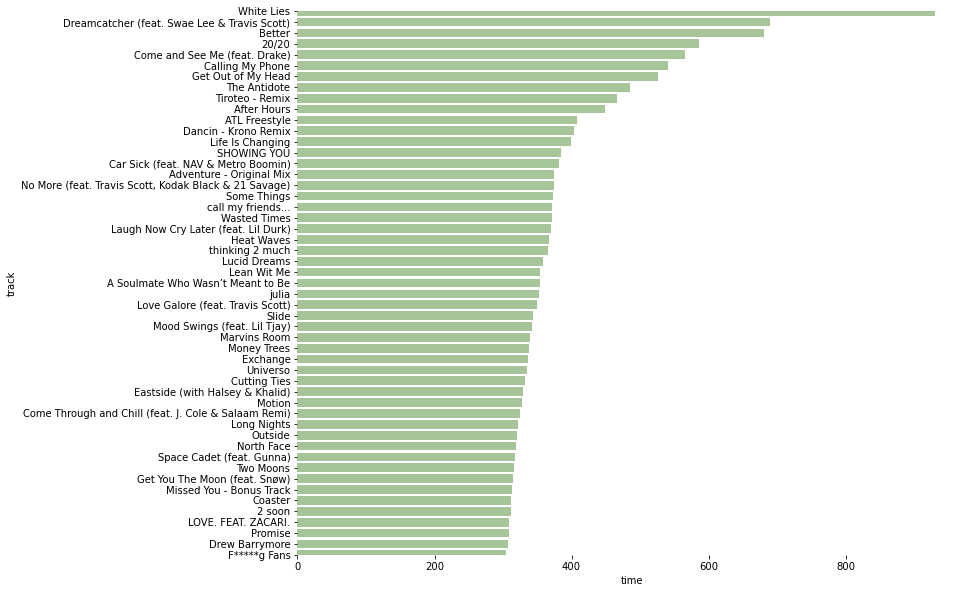

In [65]:
plt.figure(figsize=(12, 10))
sns.barplot(data=final_df, x='time', y='track', palette= 'crest')
sns.despine(left=True, bottom=True)
plt.ylim(50, 0)

(50.0, 0.0)

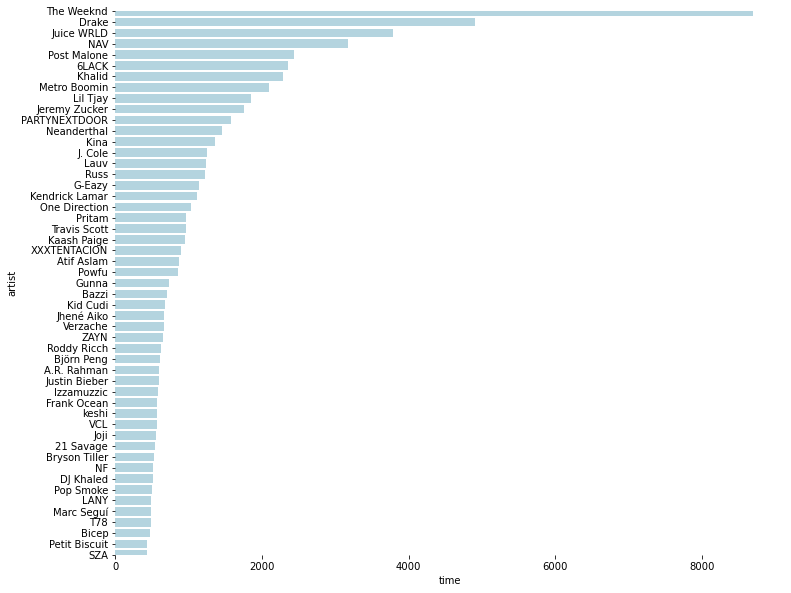

In [70]:
plt.figure(figsize=(12, 10))
sns.barplot(data=final_df2, x='time', y='artist', color='lightblue', ci=None)
sns.despine(left=True, bottom=True)
plt.ylim(50, 0)